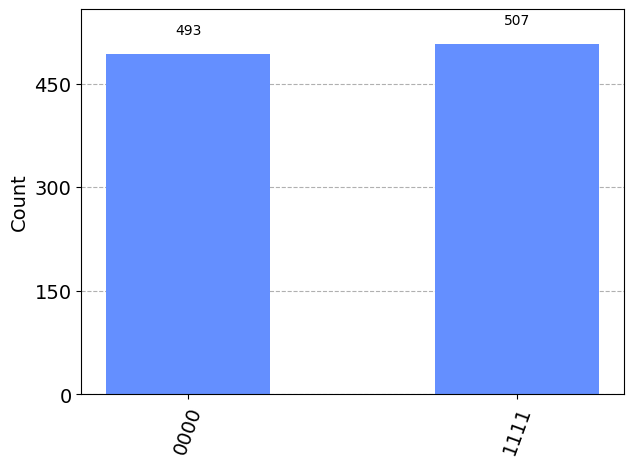

In [9]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator, StatevectorSimulator
from qiskit.visualization import *
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from qiskit.quantum_info import Operator, Statevector, random_statevector
from qiskit import QuantumCircuit, QuantumRegister, Aer, transpile, assemble
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error

def get_noise(p):

    error_meas = pauli_error([('X',p), ('I', 1 - p)])

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
        
    return noise_model

GHZ = QuantumRegister(4, name="GHZ")
GHZ_C = ClassicalRegister(4, name = "GHZ_C")
#1-1
Q1_1 = QuantumCircuit(GHZ, GHZ_C)

C1, C2, C3, C4 = GHZ


Q1_1.h(C1)
Q1_1.cx(C1, C2)
Q1_1.cx(C1, C3)
Q1_1.cx(C1, C4)

Q1_1.measure(GHZ, GHZ_C)

sim = AerSimulator()
job = sim.run(Q1_1, shots=1000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

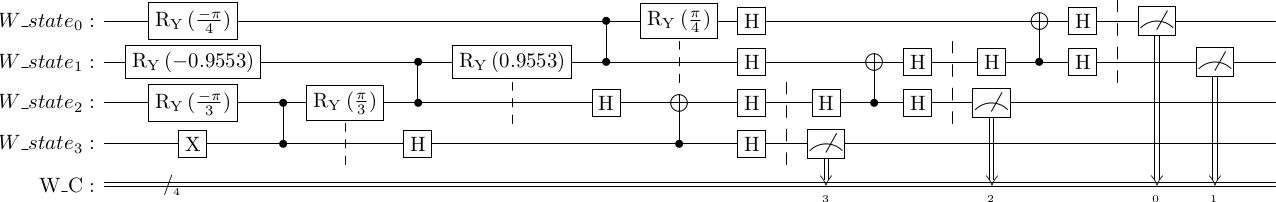

In [3]:
#1-2 W-state

W = QuantumRegister(4, name='W_state')
W_C = ClassicalRegister(4, name="W_C")

Q1_2 = QuantumCircuit(W, W_C)

def F_gate(circ,q,i,j,n,k) :
    theta = np.arccos(np.sqrt(1/(n-k+1)))
    circ.ry(-theta,q[j])       
    circ.cz(q[i],q[j])
    circ.ry(theta,q[j])
    circ.barrier(q[i])

def  cxrv(circ,q,i,j) :
    circ.h(q[i])
    circ.h(q[j])
    circ.cx(q[j],q[i])
    circ.h(q[i])
    circ.h(q[j])
    circ.barrier(q[i],q[j])
    
Q1_2.x(W[3]) #start is |1000>
F_gate(Q1_2,W,3,2,4,1) # Applying F12
F_gate(Q1_2,W,2,1,4,2) # Applying F23
F_gate(Q1_2,W,1,0,4,3) # Applying F34        
cxrv(Q1_2,W,2,3)
cxrv(Q1_2,W,1,2)
cxrv(Q1_2,W,0,1)

for i in range(4) :
    Q1_2.measure(W[i] , W_C[i]) 

Q1_2.draw("latex")

In [19]:
#1-3
noise_model = get_noise(0.01)

Alice = QuantumRegister(4, name="Alice")
Bob = QuantumRegister(4, name="Bob")
a = QuantumRegister(1, name="a")
b = QuantumRegister(1, name="b")
C_A = ClassicalRegister(4, name="C_A")
C_B = ClassicalRegister(4, name="C_B")

A1, A2, A3, A4 = Alice
B1, B2, B3, B4 = Bob

CUM = QuantumCircuit(C_A, a, Alice, Bob, b, C_B)

alpha_a = rd.random()
beta_a = rd.random()
gamma_a = rd.random()

CUM.u(alpha_a, beta_a, gamma_a, a)

alpha_b = rd.random()
beta_b = rd.random()
gamma_b = rd.random()

CUM.u(alpha_b, beta_b, gamma_b, b)

print(alpha_a, beta_a, gamma_a)
print(alpha_b, beta_b, gamma_b)

CUM.h(A1)
CUM.cx(A1, B1)
CUM.cx(A1, A2)
CUM.cx(A1, A3)

CUM.h(B4)
CUM.cx(B4, B2)
CUM.cx(B4, B3)
CUM.cx(B4, A4)

CUM.barrier(range(10))

CUM.cx(a, A1)
CUM.cx(a, A2)
CUM.cx(a, A3)
CUM.h(a)

CUM.cx(b, B4)
CUM.cx(b, B3)
CUM.cx(b, B2)
CUM.h(b)

CUM.barrier(range(10))

CUM.measure(a, C_A[0])
CUM.measure(A1, C_A[1])
CUM.measure(A2, C_A[2])
CUM.measure(A3, C_A[3])

CUM.measure(b, C_B[0])
CUM.measure(B4, C_B[1])
CUM.measure(B3, C_B[2])
CUM.measure(B2, C_B[3])

aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(CUM, aer_sim)
qobj = assemble(t_qc)
counts = aer_sim.run(qobj, noise_model=noise_model, shots=16384).result().get_counts()
print(counts)

0.22895799005462814 0.27446317471668935 0.2180774490371581
0.8853283972279872 0.17677296530157194 0.5480475288157761
{'0000 0100': 11, '1101 1011': 1, '1110 0001': 973, '0001 1110': 955, '0010 1111': 10, '0011 0001': 11, '1110 0011': 5, '0000 0110': 9, '0111 1110': 4, '0100 0000': 11, '0001 1100': 12, '1111 1111': 972, '0000 0001': 943, '0000 1110': 971, '1001 1101': 2, '0010 1110': 11, '1100 1011': 1, '1110 0000': 956, '1110 1111': 984, '1101 1111': 7, '1110 0101': 14, '0000 0000': 938, '1100 0001': 11, '1110 1100': 11, '1101 0000': 14, '0000 1111': 949, '1111 1100': 11, '0001 1111': 917, '0011 1110': 6, '0000 1011': 11, '0100 1111': 7, '0010 0000': 12, '1100 0111': 1, '1110 1110': 1026, '1111 0001': 988, '0001 0101': 8, '1111 0000': 938, '0001 0001': 949, '0000 1001': 9, '1010 0000': 14, '1111 1110': 1018, '0110 1110': 15, '0001 0000': 965, '0000 1000': 12, '1010 0001': 9, '0101 1110': 5, '1011 0000': 5, '1011 1110': 9, '0101 0000': 5, '1111 0111': 14, '0000 1010': 10, '0010 0001': 6

In [22]:
dataArray = np.zeros((16,16))

dict_keys = counts.keys()
for i in dict_keys:
    dataArray[int(i[3])*8+int(i[2])*4+int(i[1])*2+int(i[0])][int(i[8])*8+int(i[7])*4+int(i[6])*2+int(i[5])] += counts.get(i)
    # print(i, job_run_on_backend.result().get_counts().get(i))
    
    
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(threshold=sys.maxsize)   

probaArray = dataArray/counts.shots()

print(probaArray)

[[5.72509766e-02 7.32421875e-04 6.71386719e-04 1.83105469e-04 6.10351562e-04 6.10351562e-04 5.49316406e-04 5.92651367e-02 5.75561523e-02 5.49316406e-04 7.93457031e-04 4.27246094e-04 1.09863281e-03 6.71386719e-04 8.54492188e-04 5.79223633e-02]
 [7.93457031e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.10351562e-05 0.00000000e+00 0.00000000e+00 4.88281250e-04 4.88281250e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.44140625e-04]
 [6.71386719e-04 0.00000000e+00 0.00000000e+00 6.10351562e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.71386719e-04 9.76562500e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.27246094e-04]
 [4.88281250e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.88281250e-04 6.71386719e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.10351562e-05 6.10351562e-05 3.66210938e-04]
 [7.32421875e-04 0.00000000e

In [23]:
s

[[-7.10542736e-14  3.12638804e-13  1.17028571e+03 -1.17028571e+03  1.17028571e+03 -1.13686838e-13 -1.17028571e+03  5.68434189e-14  5.32907052e-14 -1.27897692e-13  4.29673115e-13  1.17028571e+03  5.68434189e-13 -1.17028571e+03  2.55795385e-13 -4.26325641e-14]
 [-1.08002496e-12 -1.63840000e+04  1.06882851e+04 -1.38901479e+04  1.38901479e+04 -7.27595761e-12 -5.30643065e+03 -9.09494702e-13  5.57065505e-12  3.18323146e-12 -2.88342568e-12  1.38901479e+04 -9.46933888e+03 -1.06882851e+04  1.63840000e+04 -3.63797881e-12]
 [ 1.08014384e+04  5.36435072e+03 -7.51447829e+04 -2.56171895e+04 -4.98688598e+03 -4.14600666e+04 -6.25891324e+03 -1.19652297e+04  4.16419090e+03  7.67374917e+03 -1.63803632e+05  7.68752912e+03  2.72427131e+03  1.35789222e+05 -3.02040222e+04 -1.03650166e+03]
 [-2.27373675e-13  1.81898940e-12 -9.82699376e+03 -5.70544699e+03  5.70544699e+03  0.00000000e+00 -1.39144782e+04  0.00000000e+00 -1.42108547e-13 -4.54747351e-13  4.40430216e-12  5.70544699e+03  1.12405821e+03  2.62109938e+

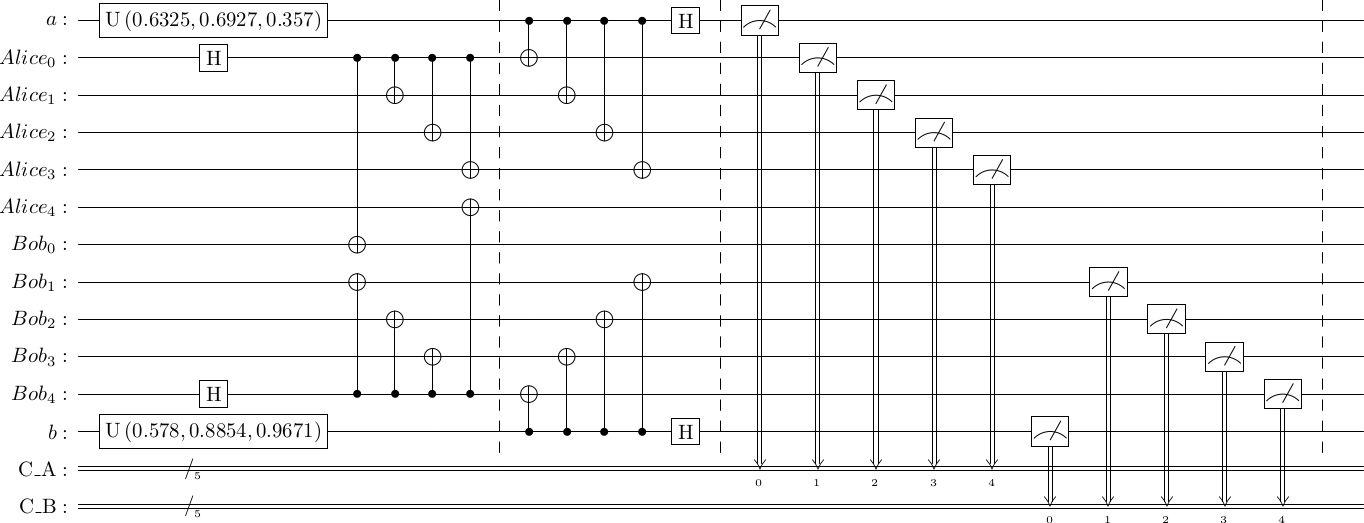

In [7]:
Alice = QuantumRegister(5, name="Alice")
Bob = QuantumRegister(5, name="Bob")
a = QuantumRegister(1, name="a")
b = QuantumRegister(1, name="b")
C_A = ClassicalRegister(5, name="C_A")
C_B = ClassicalRegister(5, name="C_B")

A1, A2, A3, A4, A5 = Alice
B1, B2, B3, B4, B5 = Bob

CUM5 = QuantumCircuit(C_A, a, Alice, Bob, b, C_B)

alpha_a1 = rd.random()
beta_a1 = rd.random()
gamma_a1 = rd.random()


CUM5.u(alpha_a1, beta_a1, gamma_a1, a)


alpha_b1 = rd.random()
beta_b1 = rd.random()
gamma_b1 = rd.random()


CUM5.u(alpha_b1, beta_b1, gamma_b1, b)


CUM5.h(A1)
CUM5.cx(A1, B1)
CUM5.cx(A1, A2)
CUM5.cx(A1, A3)
CUM5.cx(A1, A4)

CUM5.h(B5)
CUM5.cx(B5, B2)
CUM5.cx(B5, B3)
CUM5.cx(B5, B4)
CUM5.cx(B5, A5)

CUM5.barrier(range(12))

CUM5.cx(a, A1)
CUM5.cx(a, A2)
CUM5.cx(a, A3)
CUM5.cx(a, A4)
CUM5.h(a)

CUM5.cx(b, B5)
CUM5.cx(b, B4)
CUM5.cx(b, B3)
CUM5.cx(b, B2)
CUM5.h(b)


CUM5.barrier(range(12))

CUM5.measure(a, C_A[0])
CUM5.measure(A1, C_A[1])
CUM5.measure(A2, C_A[2])
CUM5.measure(A3, C_A[3])
CUM5.measure(A4, C_A[4])

CUM5.measure(b, C_B[0])
CUM5.measure(B2, C_B[1])
CUM5.measure(B3, C_B[2])
CUM5.measure(B4, C_B[3])
CUM5.measure(B5, C_B[4])

CUM5.barrier(range(12))

CUM5.draw("latex")

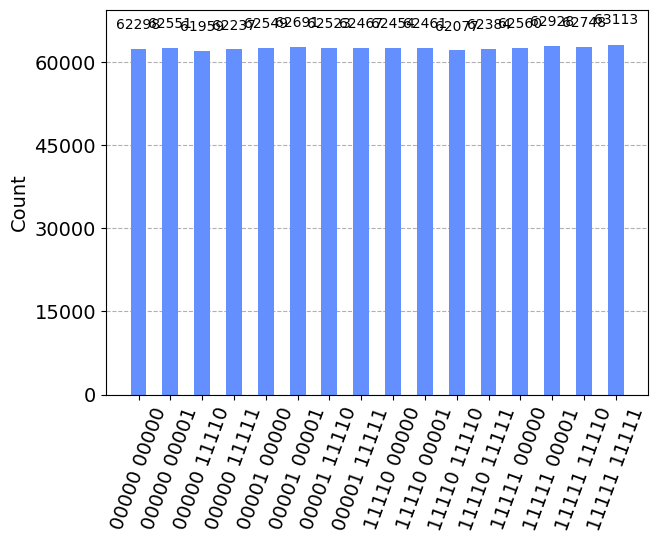

In [114]:
dict_keys = counts.keys()
sim = AerSimulator()
job = sim.run(CUM5, shots=1e6)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

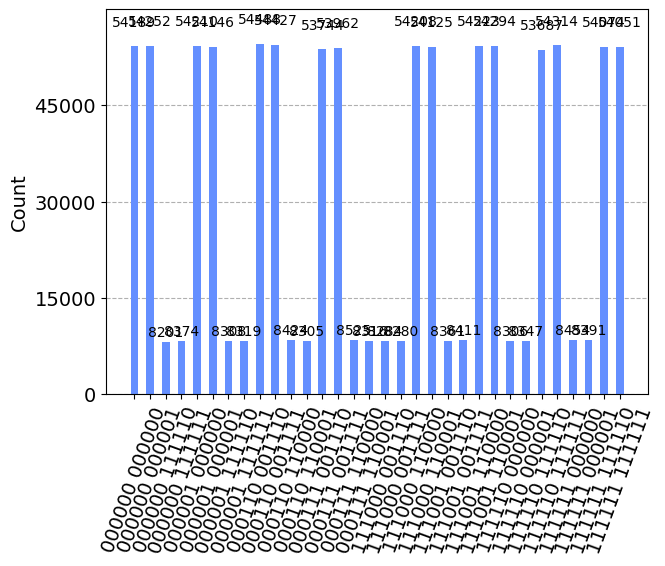

In [96]:
Alice = QuantumRegister(6, name="Alice")
Bob = QuantumRegister(6, name="Bob")
a = QuantumRegister(1, name="a")
b = QuantumRegister(1, name="b")
C_A = ClassicalRegister(6, name="C_A")
C_B = ClassicalRegister(6, name="C_B")

A1, A2, A3, A4, A5, A6 = Alice
B1, B2, B3, B4, B5, B6 = Bob

CUM6 = QuantumCircuit(C_A, a, Alice, Bob, b, C_B)

alpha_a = rd.random()
beta_a = rd.random()
gamma_a = rd.random()

CUM6.u(alpha_a, beta_a, gamma_a, a)

alpha_b = rd.random()
beta_b = rd.random()
gamma_b = rd.random()

CUM6.u(alpha_b, beta_b, gamma_b, b)

CUM6.h(A1)
CUM6.cx(A1, B1)
CUM6.cx(A1, A2)
CUM6.cx(A1, B2)
CUM6.cx(A1, A3)
CUM6.cx(A1, B3)

CUM6.h(A4)
CUM6.cx(A4, B4)
CUM6.cx(A4, A5)
CUM6.cx(A4, B5)
CUM6.cx(A4, A6)
CUM6.cx(A4, B6)

CUM6.barrier(range(14))

CUM6.cx(a, A1)
CUM6.cx(a, A2)
CUM6.cx(a, A3)
CUM6.cx(a, A4)
CUM6.cx(a, A5)
CUM6.h(a)

CUM6.cx(b, B6)
CUM6.cx(b, B5)
CUM6.cx(b, B4)
CUM6.cx(b, B3)
CUM6.cx(b, B2)
CUM6.h(b)

CUM6.barrier(range(14))

CUM6.measure(a, C_A[0])
CUM6.measure(A1, C_A[1])
CUM6.measure(A2, C_A[2])
CUM6.measure(A3, C_A[3])
CUM6.measure(A4, C_A[4])
CUM6.measure(A5, C_A[5])

CUM6.measure(b, C_B[0])
CUM6.measure(B2, C_B[1])
CUM6.measure(B3, C_B[2])
CUM6.measure(B4, C_B[3])
CUM6.measure(B5, C_B[4])
CUM6.measure(B6, C_B[5])

CUM6.barrier(range(12))

dict_keys = counts.keys()
sim = AerSimulator()
job = sim.run(CUM6, shots=1e6)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)